Давайте рассмотрим такую задачу: по параметрам района предсказать цену квартир в этом районе.
Такая задача называется задачей регрессии.

Есть классический датасет с информацией о районах Бостона, мы залили его на kaggle, вы можете скачать оттуда тестовую выборку по ссылке https://www.kaggle.com/c/boston-dataset/data (файл boston-data.csv). Загрузить данные можно с помощью pandas:

In [7]:
import pandas as pd

data = pd.read_csv('boston_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [18]:
X  = data.drop(columns=['medv'])
Y  = data['medv']

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

# описание признаков в датасете
Image(url= "https://cdn-images-1.medium.com/max/1600/1*i9vZk7NkS1dZz6JEcbV5nA.png")

Каждая строка в датасете -- описание одного из районов Бостона. Наша задача -- используя все переменные кроме последней (MEDV) предсказать значение MEDV.

Давайте сначала договоримся, как мы будем оценивать качество нашего предсказания. Обычно для этого используется метрика MSE -- mean square error. Для каждого примера мы считаем разность между истинным значением и нашим предсказанием и находим средний квадрат этих разностей.

Давайте обозначать для i-ой строки вектор значений признаков $x_i$, а истинное значение MEDV $y_i$. Предсказание нашей модели будем обозначать $f(x_i).$ Тогда качество нашей модели будет описываться формулой
$$
 MSE(f) = \frac{1}{N} \sum_{i=1}^{N} \left(f(x_i) - y_i \right)^2
$$

Как будет устроена модель? Для начала давайте посмотрим на самый простой вариант: для данного примера, со значениями признаков
$$
x_i^1, \dots, x_i^n
$$

будем вычислять предсказание нашей модели по формуле $f(x_i) = a_0 + a_1 x_i^1 + a_2 x_i^2 + \dots a_n x_i^n$. Коэффициенты $a_i$ будем выбирать так, чтобы минимизировать значение MSE для нашей формулы.

К счастью, Python умеет за нас подбирать эти коэффициенты

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [88]:
#создаем объект, который умеет все что нам нужно
X  = data.drop(columns=['medv'])
reg = LinearRegression()
#обучаем регрессию
reg.fit(X, Y)
#смотрим на качество
pred = reg.predict(X)
print (np.mean((pred - Y) ** 2))

19.31388739887513


Хорошее ли это качество? На самом деле не очень. Если мы посмотрим на распределение цен мы увидим, что наша ошибка сравнима со значением средней цены

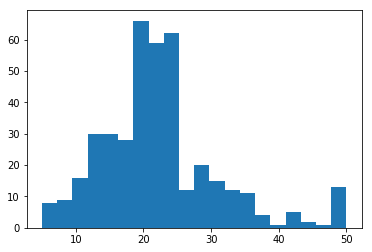

In [51]:
plt.hist(Y, bins=20);

Почему качество получается таким плохим? Дело в том, что мы подбираем линейные функции, а они не всегда хорошо соответствуют нашим данным. Давайте попробуем посмотреть на корреляцию между ценой квартиры и другими параметрами:

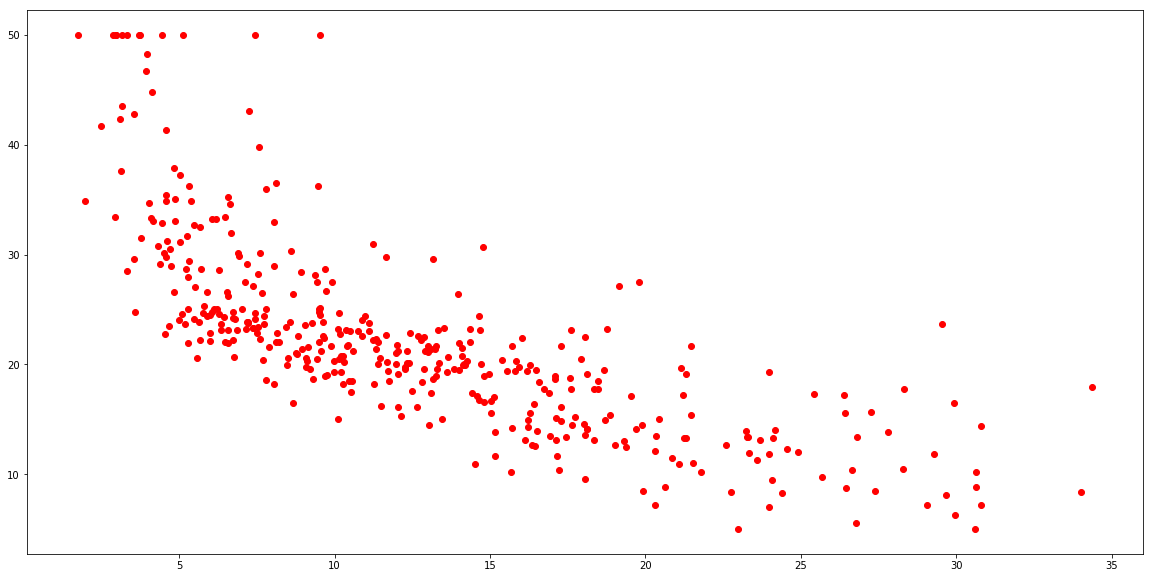

In [261]:
plt.figure(figsize=(20, 10))
plt.plot(X['lstat'], Y, 'o', c='red')
plt.show()

График больше похож на 1/x, чем на линейную функцию

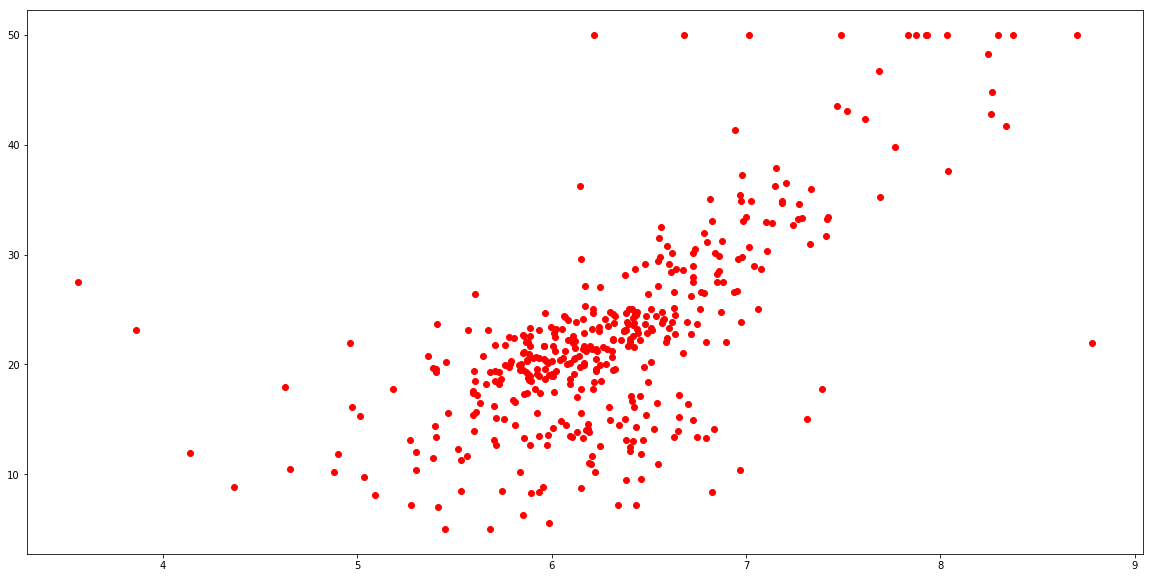

In [260]:
plt.figure(figsize=(20, 10))
plt.plot(X['rm'], Y, 'o', c='red')
plt.show()

Видно, что зависимоть не всегда похожа на линейную. Давайте попробуем к каждой фиче добавить ее степени, тогда наша регрессия по сути будет подбирать не линейную а полиномиальную функцию.

In [223]:
def add_polynomial_features(X):
    columns = X.columns
    for c in columns:
        X[c+'_2'] = X[c] ** 2
        X[c+'_3'] = X[c] ** 3
        X[c+'_4'] = X[c] ** 4
        

In [262]:
X = data.drop(columns=['medv'])
add_polynomial_features(X)
reg.fit(X, Y)
pred = reg.predict(X)
np.mean((pred - Y)** 2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6366888810087256e-25 / 1.1102230246251565e-16
  RuntimeWarning)


11.19477965770961

In [263]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,tax_4,ptratio_2,ptratio_3,ptratio_4,black_2,black_3,black_4,lstat_2,lstat_3,lstat_4
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,...,8.653651e+09,368.64,7077.888,135895.4496,142083.7636,5.355705e+07,2.018780e+10,97.6144,964.430272,9528.571087
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,...,6.505390e+09,388.09,7645.373,150613.8481,157529.6100,6.252350e+07,2.481558e+10,85.0084,783.777448,7226.428071
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,...,8.540717e+09,338.56,6229.504,114622.8736,157006.1376,6.221211e+07,2.465093e+10,99.4009,991.026973,9880.538921
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,...,2.637668e+10,216.09,3176.523,46694.8881,123798.4225,4.355847e+07,1.532605e+10,460.1025,9869.198625,211694.310506
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,...,3.486784e+09,282.24,4741.632,79659.4176,155212.3609,6.114901e+07,2.409088e+10,88.9249,838.561807,7907.637840


Качество улучшилось почти в два раза. Но честный ли это замер?

Одна из главных проблем в машинном обучении -- переобучение. Если модель достаточно сложна, то она может просто "запомнить" ответы для всех примеров. Это позволит получить хорошее качество модели, но если она увидит новый пример, она почти ничего не будет про него понимать.

Чтобы делать честный замер, нужно разделить множества на котором мы обучаем модель и множество, на котором мы измеряем качество.

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [271]:
#No extra features
X = data.drop(columns=['medv'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
reg.fit(X_train, Y_train);
pred = reg.predict(X_test)
np.mean((pred - Y_test) ** 2)

22.795127884639488

In [272]:
#Extra features
reg_poly = LinearRegression()
X = data.drop(columns=['medv'])
add_polynomial_features(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
reg_poly.fit(X_train, Y_train);
pred = reg_poly.predict(X_test)
np.mean((pred - Y_test) ** 2)

29.74047475397478

Это типичная картина при переобучении: качество на обучающей выборке улучшается, а на тестовой заметно ухудшается. Как с этим бороться? Один из путей такой. Мы хотим сделать так, чтобы модель оставалось достаточно простой, несмотря на количество фичей. Одним из показателей сложной модели являются большие по модулю значения коэффициентов $a_i$. Можно например к нашей метрики качества модели MSE добавить штраф за сложность модели в виде $\alpha \sum a_i^2$. Коэффициент $\alpha$ отвечает за то, насколько нам важна сложность модели. При $\alpha$ равном 0 штрафа нет, при очень большом значении все коэффициенты будут равны 0. Такую функциональность обеспечивает класс

In [131]:
from sklearn.linear_model import Ridge

In [243]:
reg_ridge = Ridge(alpha=100.0)
X = data.drop(columns=['medv'])
add_polynomial_features(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
reg_ridge.fit(X_train, Y_train);
pred = reg_ridge.predict(X_test)
np.mean((pred - Y_test) ** 2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.899387166796902e-23 / 1.1102230246251565e-16
  RuntimeWarning)


26.274758765366585

Поэкспериментируйте с параметром alpha. При каком alpha получается наилучшее качество на тесте? Постройте график зависимости качества на тесте от значения alpha. Совет: alpha дучше выбирать экспоненциально меняющимся, например от 1e-5 до 1e5.

К сожалению, в такой постановке мы все еще можем переобучиться под наши данные: мы выберем alpha так, чтобы оптимизровать результат на нашем тесте, а он может случайно оказаться нехарактерным.

Обычно чтобы уменьшить этот эффект используют k-fold cross-validation: данные k раз делят на k частей ("фолдов"), k-1 используют для обучения, а оставшуюся -- как тест, после этого качество усредняют по всем фолдам и подбирают гиперпараметры так, чтобы максимизировать это усредненное качество.


Задание: реализуйте описанный алгоритм.

## Kaggle

Попробуйте поучаствовать в контесте на Kaggle. Качайте тестовую выборку из https://www.kaggle.com/c/boston-dataset/data

In [246]:
test = pd.read_csv('boston_test_data.csv')

test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
1,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
2,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
3,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
4,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


Как вы видите, здесь значения medv не даны -- их знает система и будет глядя на них оценивать ваш результат.

Используем наш регрессор и получим предсказания для тестовых данных:

In [255]:
X_test = test.copy()
add_polynomial_features(X_test)
pred_test = reg_ridge.predict(X_test)

На kaggle нужно загрузить результаты в формате csv, в виде файла содержащего две колонки: номер примера и ваше предсказание.

In [273]:
count = len(pred_test)
result = pd.DataFrame({'id' : np.arange(count), 'price' : pred_test})
result.to_csv('test.csv', index=None)

Полученный файл можно загрузить на kaggle и посмотреть результат. 
Вы должны получить результат примерно как у преподавателей. Более высокие результаты в таблице получены участниками, которые использовали более эффективные алгоритмы, чем линейная регрессия

Поэкспериментируйте с новыми фичами, которые вы добавляете. Это не обязательно должны быть степени исходных фичей.
Попробуйте улучшить качество вашего предиктора. Не забывайте про кросс-валидацию!